# <center>Diversity of Music Consumption across Countries - Spotify<center>

-------
# Table of Contents

1. [Preliminary Analysis](#Preliminary-Analysis)
3. [Network Graph](#Network-Graph)
4. [Culture](#Culture)
5. [Language](#Language)
6. [Social Distance](#Social-Distance)
7. [Home Bias](#Home-Bias)
8. [Gravity Model](#Gravity-Model)

-----

# Preliminary Analysis

- Data from 2017-01-01 to 2021-06-28
- Release Years: 2017, 2018, 2019, 2020, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

os.chdir('/Users/sunnihermann/Desktop/')
print(os.getcwd())

/Users/sunnihermann/Desktop


In [2]:
spotify_chart = pd.read_csv('MasterThesis/sportify_chart_viral.csv')

In [3]:
print(spotify_chart.shape)
spotify_chart.columns.values

(5204603, 24)


array(['Unnamed: 0', 'Position', 'Track Name', 'Artist', 'URL', 'date',
       'country', 'artists', 'id', 'external_urls_spotify',
       'external_ids_isrc', 'issue_country', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'], dtype=object)

In [4]:
spotify_chart = spotify_chart.drop(columns='Unnamed: 0')

In [5]:
spotify_chart.head(1)

,Position,Track Name,Artist,URL,date,country,artists,id,external_urls_spotify,external_ids_isrc,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,Déjala Que Baile (with Alejandro Sanz & Arkano),Melendi,https://open.spotify.com/track/2KK9N6iBAisA0bo...,2018-10-01,ad,[{'external_urls': {'spotify': 'https://open.s...,2KK9N6iBAisA0booTu3bGd,https://open.spotify.com/track/2KK9N6iBAisA0bo...,ES5021800006,...,11.0,-4.456,0.0,0.174,0.356,0.0,0.0796,0.598,95.973,4.0


In [6]:
spotify_chart['year'] = spotify_chart['date'].astype(str).str[:4]

In [7]:
spotify_chart.isnull().sum()
#Null values Track Name & Artist do not matter for us as only Streams/country/... are relevant variables

Position                   0
Track Name                 4
Artist                    41
URL                        0
date                       0
country                    0
artists                    0
id                         0
external_urls_spotify      0
external_ids_isrc          0
issue_country              0
danceability             102
energy                   102
key                      102
loudness                 102
mode                     102
speechiness              102
acousticness             102
instrumentalness         102
liveness                 102
valence                  102
tempo                    102
time_signature           102
year                       0
dtype: int64

In [8]:
#Data from 01.01.2017 - 28.06.2021
print(spotify_chart.date.min())
print(spotify_chart.date.max())

print("\n Release Years:")
spotify_chart.year.value_counts()

2017-01-01
2021-09-30

 Release Years:


2020    1134833
2019    1134395
2018    1068542
2017     958675
2021     908158
Name: year, dtype: int64

In [9]:
print(spotify_chart.Position.min())
print(spotify_chart.Position.max())
#print(spotify_chart.groupby('Position').count()['id'])

1
54


In [10]:
spotify_chart['date'] = pd.to_datetime(spotify_chart['date'], format='%Y-%m-%d')

In [11]:
spotify_chart['country'] = spotify_chart['country'].str.upper()
print(spotify_chart.country.nunique())

70


In [12]:
spotify_chart.country.unique()

array(['AD', 'CO', 'MX', 'PY', 'ES', 'PE', 'GT', 'CR', 'SV', 'PA', 'UY',
       'NI', 'AR', 'BO', 'CL', 'DO', 'CH', 'EC', 'HN', 'NZ', 'FI', 'AE',
       'CZ', 'PL', 'IL', 'ZA', 'IS', 'IE', 'TR', 'FR', 'PT', 'GB', 'NL',
       'GR', 'HK', 'ID', 'BR', 'TH', 'US', 'IT', 'MY', 'CA', 'VN', 'EE',
       'SG', 'JP', 'SK', 'LV', 'MA', 'BG', 'RO', 'EG', 'SE', 'TW', 'CY',
       'NO', 'AT', 'AU', 'HU', 'LU', 'BE', 'SA', 'LT', 'DE', 'PH', 'IN',
       'KR', 'UA', 'DK', 'RU'], dtype=object)

In [13]:
#AD, CY only in dataset df_viral (CY: Cyprus, AD: Andorra)

-----

# Country Pairs

### Getting the issuing country of the song

In [14]:
#ISCR format first 2 digits is the country code
spotify_chart['issue_country'] = spotify_chart['external_ids_isrc'].str[:2]
spotify_chart['issue_country'] = spotify_chart['issue_country'].str.upper()

In [15]:
spotify_chart['issue_country'].unique()

array(['ES', 'QZ', 'US', 'QM', 'GB', 'NL', 'DE', 'UK', 'FR', 'AU', 'MX',
       'CY', 'SE', 'AR', 'NO', 'BR', 'CO', 'GM', 'PT', 'CA', 'IT', 'IE',
       'CH', 'ZA', 'UY', 'IS', 'DO', 'RU', 'KR', 'BE', 'JP', 'FI', 'BX',
       'CL', 'DK', 'PH', 'NZ', 'IN', 'TW', 'BG', 'VE', 'IL', 'AT', 'HK',
       'FX', 'PL', 'RO', 'HU', 'AE', 'GR', 'JM', 'PE', 'BC', 'KS', 'GX',
       'PG', 'DG', 'NG', 'MY', 'EE', 'CN', 'AL', 'XK', 'AZ', 'MT', 'LV',
       'RS', 'VN', 'SM', 'HA', 'CZ', 'HR', 'LT', 'UA', 'SK', 'NK', 'EG',
       'LB', 'PK', 'SG', 'BH', 'ID', 'TR', 'CB', 'KE', 'ZB', 'GT', 'DZ',
       'CI', 'VG', 'TT', 'SI', 'MO', 'TH', 'PY', 'BA', 'UM', 'BD', 'QT',
       'VI', 'EU', 'PA', 'CR', 'MR', 'XX', 'AF', 'BO', 'AV', 'AM', 'LU',
       'HN'], dtype=object)

In [16]:
spotify_chart.loc[spotify_chart['issue_country']=='QM', 'issue_country'] = 'US'
spotify_chart.loc[spotify_chart['issue_country']=='QZ', 'issue_country'] = 'US'
spotify_chart.loc[spotify_chart['issue_country']=='UK', 'issue_country'] = 'GB'
spotify_chart.loc[spotify_chart['issue_country']=='GX', 'issue_country'] = 'GB'
spotify_chart.loc[spotify_chart['issue_country']=='KS', 'issue_country'] = 'KR'
spotify_chart.loc[spotify_chart['issue_country']=='FX', 'issue_country'] = 'FR'
spotify_chart.loc[spotify_chart['issue_country']=='CB', 'issue_country'] = 'CA'
spotify_chart.loc[spotify_chart['issue_country']=='FX', 'issue_country'] = 'FR'
spotify_chart.loc[spotify_chart['issue_country']=='BP', 'issue_country'] = 'BR'
spotify_chart.loc[spotify_chart['issue_country']=='BX', 'issue_country'] = 'BR'
spotify_chart.loc[spotify_chart['issue_country']=='BC', 'issue_country'] = 'BR'
spotify_chart.loc[spotify_chart['issue_country']=='T-', 'issue_country'] = 'TW'
spotify_chart = spotify_chart.loc[(spotify_chart['issue_country']!='XX')]

In [17]:
#bc of language 
spotify_chart = spotify_chart.loc[spotify_chart.country != 'AD']
spotify_chart = spotify_chart.loc[spotify_chart.issue_country != 'AD']

In [18]:
print('Issue country unique: ', spotify_chart['issue_country'].nunique())
print('Country unique: ', spotify_chart['country'].nunique())
print(spotify_chart['issue_country'].isnull().sum())

Issue country unique:  101
Country unique:  69
0


In [19]:
spotify_chart.groupby(['issue_country'])['URL'].count().sort_values(ascending=False)[:5]

issue_country
US    2832267
GB     520007
FR     201144
DE     136422
KR     114736
Name: URL, dtype: int64

------
### Country-pairs without years

In [20]:
#Counting the song days
country_pairs = spotify_chart.groupby(['country', 'issue_country'])['URL'].count().reset_index()
print(country_pairs.shape)
country_pairs.head()

(3019, 3)


,country,issue_country,URL
0,AE,AE,775
1,AE,AR,2
2,AE,AT,52
3,AE,AU,342
4,AE,BE,33


In [21]:
no_market_country = set(list(country_pairs.issue_country.unique())) - set(list(country_pairs.country.unique()))
#no_market_country #remaining are the countries where songs are produced that are no where in the charts

country_pairs = country_pairs.loc[~country_pairs['issue_country'].isin(no_market_country)] 
# ~ means NOT --> deleting no_market_countries from the country pairs, as they are not relevant

In [22]:
print(country_pairs['country'].nunique())
print(country_pairs['issue_country'].nunique())

69
64


In [23]:
country_pairs.shape

(2679, 3)

In [24]:
country_pairs.to_csv('country_pairs_viral.csv')

In [25]:
country_pairs_no_mutual = country_pairs.loc[country_pairs['country'] != country_pairs['issue_country']]
country_pairs_no_mutual.shape

(2615, 3)

------
### Now with 'years'

In [26]:
country_pairs_year = spotify_chart.groupby(['country', 'issue_country', 'year'])['URL'].count().reset_index()
country_pairs_year.head()

,country,issue_country,year,URL
0,AE,AE,2019,530
1,AE,AE,2020,220
2,AE,AE,2021,25
3,AE,AR,2021,2
4,AE,AT,2020,6


In [27]:
no_market_country = set(list(country_pairs_year.issue_country.unique())) - set(list(country_pairs_year.country.unique()))
country_pairs_year = country_pairs_year.loc[~country_pairs_year['issue_country'].isin(no_market_country)]

print(country_pairs_year.shape)

(8846, 4)


In [28]:
print(country_pairs_year.country.nunique())
print(country_pairs_year.issue_country.nunique())

69
64


In [29]:
#country_pairs_year.to_csv('country_pairs_year.csv')

In [30]:
country_pairs_no_mutual_year = country_pairs_year.loc[country_pairs_year['country'] != country_pairs_year['issue_country']]
country_pairs_no_mutual_year.shape

(8570, 4)

In [31]:
#country_pairs_no_mutual_year.loc[country_pairs_no_mutual_year['country']=='UK', 'country'] = 'GB'
#country_pairs_no_mutual_year.loc[country_pairs_no_mutual_year['issue_country']=='UK', 'issue_country'] = 'GB'

In [32]:
#country_pairs_no_mutual_year.shape

------

# Culture

## --> Hofstede's Cultural Dimensions

**Hypotheses: The consumption of music is culturally shaped**

- music itself is a cultural good --> counties that are cultural similar should have similar taste if the culture is similar, easier to accept culture from other country beyond the language // culture forms similar taste (eg accept sth from the Netherland bc similar culture )


--> Supplement the dataset with Hofstede's cultural dimensions. Hofstede describes 6 comparison criteria that represent similarities and differences between cultures. Euclidean distance can be used as a measure of similarity between countries.

- *pdi = Power Distance*
- *idv = Individualism*
- *mas = Masculinity*
- *uai = Uncertainty Avoidance*
- *ltowvs = Long-Term Orientation*
- *ivr = Indulgence*

In [33]:
culture_countries = pd.read_csv('MasterThesis/6-dimensions-for-website-2015-08-16.csv', sep=';',
                               na_values='#NULL!')
culture_countries.head()

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64.0,27.0,41.0,52.0,32.0,40.0
1,AFW,Africa West,77.0,20.0,46.0,54.0,9.0,78.0
2,ALB,Albania,NaN,NaN,NaN,NaN,61.0,15.0
3,ALG,Algeria,NaN,NaN,NaN,NaN,26.0,32.0
4,AND,Andorra,NaN,NaN,NaN,NaN,NaN,65.0


In [34]:
country_pairs_culture = country_pairs.copy()
country_pairs_culture.shape

(2679, 3)

In [35]:
import pycountry

def get_country_name(country_code):
    return pycountry.countries.get(alpha_2=country_code)

get_country_name('AE').name

'United Arab Emirates'

In [36]:
#Getting the full name COUNTRY
country_name = []

for country in country_pairs_culture['country']:
    country_name.append(get_country_name(country).name)
#country_name 

In [37]:
#Getting the full name ISSUE_COUNTRY
issue_country_name = []

for country in country_pairs_culture['issue_country']:
    issue_country_name.append(get_country_name(country).name)
#issue_country_name 

In [38]:
country_pairs_culture['issue_country_fullname'] = issue_country_name
country_pairs_culture['country_fullname'] = country_name
country_pairs_culture.head(3)

,country,issue_country,URL,issue_country_fullname,country_fullname
0,AE,AE,775,United Arab Emirates,United Arab Emirates
1,AE,AR,2,Argentina,United Arab Emirates
2,AE,AT,52,Austria,United Arab Emirates


In [39]:
culture_countries.head(3)

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64.0,27.0,41.0,52.0,32.0,40.0
1,AFW,Africa West,77.0,20.0,46.0,54.0,9.0,78.0
2,ALB,Albania,NaN,NaN,NaN,NaN,61.0,15.0


In [40]:
print(country_pairs_culture.shape)
print(culture_countries.shape)

(2679, 5)
(111, 8)


In [41]:
#country_pairs_culture.country_fullname.unique()
#culture_countries.country.unique()

In [42]:
#Renaming country names in Hofstede Dataset so they match with spotify dataset

culture_countries.loc[culture_countries['country']=='Arab countries', 'country'] = 'United Arab Emirates'
culture_countries.loc[culture_countries['country']=='Belgium French', 'country'] = 'Belgium'
culture_countries.loc[culture_countries['country']=='Belgium Netherl', 'country'] = 'Belgium'
culture_countries.loc[culture_countries['country']=='Canada French', 'country'] = 'Canada'
culture_countries.loc[culture_countries['country']=='Czech Rep', 'country'] = 'Czechia'
culture_countries.loc[culture_countries['country']=='Dominican Rep', 'country'] = 'Dominican Republic'
culture_countries.loc[culture_countries['country']=='Germany East', 'country'] = 'Germany'
culture_countries.loc[culture_countries['country']=='Great Britain', 'country'] = 'United Kingdom'
culture_countries.loc[culture_countries['country']=='Korea South', 'country'] = 'Korea, Republic of'
culture_countries.loc[culture_countries['country']=='Russia', 'country'] = 'Russian Federation'
culture_countries.loc[culture_countries['country']=='Slovak Rep', 'country'] = 'Slovakia'
culture_countries.loc[culture_countries['country']=='South Africa white', 'country'] = 'South Africa'
culture_countries.loc[culture_countries['country']=='Switzerland French', 'country'] = 'Switzerland'
culture_countries.loc[culture_countries['country']=='Switzerland German', 'country'] = 'Switzerland'
culture_countries.loc[culture_countries['country']=='Taiwan', 'country'] = 'Taiwan, Province of China'
culture_countries.loc[culture_countries['country']=='U.S.A.', 'country'] = 'United States'
culture_countries.loc[culture_countries['country']=='Vietnam', 'country'] = 'Viet Nam'

In [43]:
####BELGIUM

In [44]:
culture_countries.loc[culture_countries['country']=='Belgium']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
13,BEL,Belgium,65.0,75.0,54.0,94.0,82.0,57.0
14,BEF,Belgium,67.0,72.0,60.0,93.0,NaN,NaN
15,BEN,Belgium,61.0,78.0,43.0,97.0,NaN,NaN


In [45]:
#Replace NaN with 0 
culture_countries.loc[culture_countries['ctr']=='BEF', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='BEF', 'ivr'] = 0
culture_countries.loc[culture_countries['ctr']=='BEN', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='BEN', 'ivr'] = 0
culture_countries.loc[culture_countries['country']=='Belgium']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
13,BEL,Belgium,65.0,75.0,54.0,94.0,82.0,57.0
14,BEF,Belgium,67.0,72.0,60.0,93.0,0.0,0.0
15,BEN,Belgium,61.0,78.0,43.0,97.0,0.0,0.0


In [46]:
#Summing Belgium up to one cell and deleting the other 2
belgium = culture_countries.loc[culture_countries['country']=='Belgium']

i = 2
while i <= 5:
    belgium.iloc[0,i] = sum(belgium.iloc[:,i])/3
    i += 1

belgium

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
13,BEL,Belgium,64.333333,75.0,52.333333,94.666667,82.0,57.0
14,BEF,Belgium,67.000000,72.0,60.000000,93.000000,0.0,0.0
15,BEN,Belgium,61.000000,78.0,43.000000,97.000000,0.0,0.0


In [47]:
belgium = belgium.drop([14, 15])
culture_countries.loc[culture_countries['country']=='Belgium'] = belgium
culture_countries.loc[culture_countries['country']=='Belgium']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
13,BEL,Belgium,64.333333,75.0,52.333333,94.666667,82.0,57.0


In [48]:
####CANADA

In [49]:
culture_countries.loc[culture_countries['country']=='Canada']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
20,CAN,Canada,39.0,80.0,52.0,48.0,36.0,68.0
21,CAF,Canada,54.0,73.0,45.0,60.0,NaN,NaN


In [50]:
culture_countries.loc[culture_countries['ctr']=='CAF', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='CAF', 'ivr'] = 0

In [51]:
#Summing Canada up to one cell
canada = culture_countries.loc[culture_countries['country']=='Canada']

i = 2
while i <= 5:
    canada.iloc[0,i] = sum(canada.iloc[:,i])/2
    i += 1

canada

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
20,CAN,Canada,46.5,76.5,48.5,54.0,36.0,68.0
21,CAF,Canada,54.0,73.0,45.0,60.0,0.0,0.0


In [52]:
canada = canada.drop([21])
culture_countries.loc[culture_countries['country']=='Canada'] = canada
culture_countries.loc[culture_countries['country']=='Canada']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
20,CAN,Canada,46.5,76.5,48.5,54.0,36.0,68.0


In [53]:
####Germany

In [54]:
culture_countries.loc[culture_countries['country']=='Germany']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
39,GER,Germany,35.0,67.0,66.0,65.0,83.0,40.0
40,GEE,Germany,NaN,NaN,NaN,NaN,78.0,34.0


In [55]:
culture_countries.loc[culture_countries['ctr']=='GEE', 'pdi'] = 0
culture_countries.loc[culture_countries['ctr']=='GEE', 'idv'] = 0
culture_countries.loc[culture_countries['ctr']=='GEE', 'mas'] = 0
culture_countries.loc[culture_countries['ctr']=='GEE', 'uai'] = 0

In [56]:
#Summing Germany up to one cell
germany = culture_countries.loc[culture_countries['country']=='Germany']

i = 6
while i <= 7:
    germany.iloc[0,i] = sum(germany.iloc[:,i])/2
    i += 1

germany

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
39,GER,Germany,35.0,67.0,66.0,65.0,80.5,37.0
40,GEE,Germany,0.0,0.0,0.0,0.0,78.0,34.0


In [57]:
germany = germany.drop([40])
culture_countries.loc[culture_countries['country']=='Germany'] = germany
culture_countries.loc[culture_countries['country']=='Germany']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
39,GER,Germany,35.0,67.0,66.0,65.0,80.5,37.0


In [58]:
####Switzerland

In [59]:
culture_countries.loc[culture_countries['country']=='Switzerland']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
95,SWI,Switzerland,34.0,68.0,70.0,58.0,74.0,66.0
96,SWF,Switzerland,70.0,64.0,58.0,70.0,NaN,NaN
97,SWG,Switzerland,26.0,69.0,72.0,56.0,NaN,NaN


In [60]:
culture_countries.loc[culture_countries['ctr']=='SWF', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='SWF', 'ivr'] = 0
culture_countries.loc[culture_countries['ctr']=='SWG', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='SWG', 'ivr'] = 0

In [61]:
#Summing Switzerland up to one cell
switzlerland = culture_countries.loc[culture_countries['country']=='Switzerland']

i = 2
while i <= 5:
    switzlerland.iloc[0,i] = sum(switzlerland.iloc[:,i])/3
    i += 1

switzlerland

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
95,SWI,Switzerland,43.333333,67.0,66.666667,61.333333,74.0,66.0
96,SWF,Switzerland,70.000000,64.0,58.000000,70.000000,0.0,0.0
97,SWG,Switzerland,26.000000,69.0,72.000000,56.000000,0.0,0.0


In [62]:
switzlerland = switzlerland.drop([96,97])
culture_countries.loc[culture_countries['country']=='Switzerland'] = switzlerland
culture_countries.loc[culture_countries['country']=='Switzerland']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
95,SWI,Switzerland,43.333333,67.0,66.666667,61.333333,74.0,66.0


In [63]:
####South Africa

In [64]:
culture_countries.loc[culture_countries['country']=='South Africa']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
90,SAF,South Africa,NaN,NaN,NaN,NaN,34.0,63.0
91,SAW,South Africa,49.0,65.0,63.0,49.0,NaN,NaN


In [65]:
culture_countries.loc[culture_countries['ctr']=='SAF', 'pdi'] = 49.0
culture_countries.loc[culture_countries['ctr']=='SAF', 'idv'] = 65.0
culture_countries.loc[culture_countries['ctr']=='SAF', 'mas'] = 63.0
culture_countries.loc[culture_countries['ctr']=='SAF', 'uai'] = 49.0
#culture_countries.loc[culture_countries['ctr']=='SAW', 'ivr'] = 0
#culture_countries.loc[culture_countries['ctr']=='SAW', 'ivr'] = 0

In [66]:
culture_countries.loc[culture_countries['country']=='South Africa'] = culture_countries.loc[culture_countries['country']=='South Africa'].drop([91])
culture_countries.loc[culture_countries['country']=='South Africa']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
90,SAF,South Africa,49.0,65.0,63.0,49.0,34.0,63.0


------

In [67]:
#merging on COUNTRY FULL NAME with culture countries
country_pairs_culture = country_pairs_culture.merge(culture_countries, how = 'left', left_on='country_fullname', right_on='country')
country_pairs_culture.head(3)

,country_x,issue_country,URL,issue_country_fullname,country_fullname,ctr,country_y,pdi,idv,mas,uai,ltowvs,ivr
0,AE,AE,775,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,68.0,23.0,34.0
1,AE,AR,2,Argentina,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,68.0,23.0,34.0
2,AE,AT,52,Austria,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,68.0,23.0,34.0


In [68]:
country_pairs_culture.shape

(2679, 13)

In [69]:
#merging with ISSUE COUNTRY FULL NAME cultural dimensions
country_pairs_culture = country_pairs_culture.merge(culture_countries, how='left', left_on='issue_country_fullname', right_on='country')
country_pairs_culture.head(3)

,country_x,issue_country,URL,issue_country_fullname,country_fullname,ctr_x,country_y,pdi_x,idv_x,mas_x,...,ltowvs_x,ivr_x,ctr_y,country,pdi_y,idv_y,mas_y,uai_y,ltowvs_y,ivr_y
0,AE,AE,775,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,...,23.0,34.0,ARA,United Arab Emirates,80.0,38.0,53.0,68.0,23.0,34.0
1,AE,AR,2,Argentina,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,...,23.0,34.0,ARG,Argentina,49.0,46.0,56.0,86.0,20.0,62.0
2,AE,AT,52,Austria,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,...,23.0,34.0,AUT,Austria,11.0,55.0,79.0,70.0,60.0,63.0


In [70]:
country_pairs_culture.shape
#now 22 columns bc we added cultural dimension of COUNTRY and ISSUE COUNTRY to calculate difference

(2679, 21)

In [71]:
country_pairs_culture.isnull().sum()

country_x                   0
issue_country               0
URL                         0
issue_country_fullname      0
country_fullname            0
ctr_x                     137
country_y                 137
pdi_x                     340
idv_x                     340
mas_x                     340
uai_x                     340
ltowvs_x                  315
ivr_x                     317
ctr_y                       5
country                     5
pdi_y                     168
idv_y                     168
mas_y                     168
uai_y                     168
ltowvs_y                   86
ivr_y                      72
dtype: int64

In [72]:
#Calculating the differences between  Hofstede's cultural dimensions country - issue country
#How diffrent are the two countries that we look at?

country_pairs_culture['pdi_difference'] = np.abs(country_pairs_culture['pdi_x']- country_pairs_culture['pdi_y'])
country_pairs_culture['idv_difference'] = np.abs(country_pairs_culture['idv_x']- country_pairs_culture['idv_y'])
country_pairs_culture['mas_difference'] = np.abs(country_pairs_culture['mas_x']- country_pairs_culture['mas_y'])
country_pairs_culture['uai_difference'] = np.abs(country_pairs_culture['uai_x']- country_pairs_culture['uai_y'])
country_pairs_culture['ltowvs_difference'] = np.abs(country_pairs_culture['ltowvs_x']- country_pairs_culture['ltowvs_y'])
country_pairs_culture['ivr_difference'] = np.abs(country_pairs_culture['ivr_x']- country_pairs_culture['ivr_y'])

In [73]:
country_pairs_culture.head(3)

,country_x,issue_country,URL,issue_country_fullname,country_fullname,ctr_x,country_y,pdi_x,idv_x,mas_x,...,mas_y,uai_y,ltowvs_y,ivr_y,pdi_difference,idv_difference,mas_difference,uai_difference,ltowvs_difference,ivr_difference
0,AE,AE,775,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,...,53.0,68.0,23.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AE,AR,2,Argentina,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,...,56.0,86.0,20.0,62.0,31.0,8.0,3.0,18.0,3.0,28.0
2,AE,AT,52,Austria,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,53.0,...,79.0,70.0,60.0,63.0,69.0,17.0,26.0,2.0,37.0,29.0


In [74]:
country_pairs_culture[['URL', 'pdi_difference', 'idv_difference', 'mas_difference', 'uai_difference',
                        'ltowvs_difference', 'ivr_difference']].corr()

,URL,pdi_difference,idv_difference,mas_difference,uai_difference,ltowvs_difference,ivr_difference
URL,1.000000,-0.085005,0.085488,-0.086210,-0.026375,-0.090647,-0.079397
pdi_difference,-0.085005,1.000000,0.345511,0.137963,0.212878,-0.008178,0.214656
idv_difference,0.085488,0.345511,1.000000,0.001636,0.221001,0.091135,0.150754
mas_difference,-0.086210,0.137963,0.001636,1.000000,0.119824,0.039018,0.102077
uai_difference,-0.026375,0.212878,0.221001,0.119824,1.000000,0.023305,0.091564
ltowvs_difference,-0.090647,-0.008178,0.091135,0.039018,0.023305,1.000000,0.202969
ivr_difference,-0.079397,0.214656,0.150754,0.102077,0.091564,0.202969,1.000000


- no findings necesarry here, just to see how the dimensions correlate with each other

-----

### Now with years

In [75]:
country_pairs_culture_year = country_pairs_year.copy()
country_pairs_culture_year.shape
country_pairs_culture_year.head()

,country,issue_country,year,URL
0,AE,AE,2019,530
1,AE,AE,2020,220
2,AE,AE,2021,25
3,AE,AR,2021,2
4,AE,AT,2020,6


In [76]:
country_name = []

for country in country_pairs_culture_year['country']:
    country_name.append(get_country_name(country).name)

issue_country_name = []

for country in country_pairs_culture_year['issue_country']:
    issue_country_name.append(get_country_name(country).name)
    
country_pairs_culture_year['issue_country_fullname'] = issue_country_name
country_pairs_culture_year['country_fullname'] = country_name

In [77]:
country_pairs_culture_year = country_pairs_culture_year.merge(culture_countries, how='left', 
                                                              left_on='country_fullname', right_on='country')


In [78]:
country_pairs_culture_year = country_pairs_culture_year.merge(culture_countries, how='left', 
                                                              left_on='issue_country_fullname', right_on='country')


In [79]:
print(country_pairs_culture_year.shape)
country_pairs_culture_year.head()

(8846, 22)


,country_x,issue_country,year,URL,issue_country_fullname,country_fullname,ctr_x,country_y,pdi_x,idv_x,...,ltowvs_x,ivr_x,ctr_y,country,pdi_y,idv_y,mas_y,uai_y,ltowvs_y,ivr_y
0,AE,AE,2019,530,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,23.0,34.0,ARA,United Arab Emirates,80.0,38.0,53.0,68.0,23.0,34.0
1,AE,AE,2020,220,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,23.0,34.0,ARA,United Arab Emirates,80.0,38.0,53.0,68.0,23.0,34.0
2,AE,AE,2021,25,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,23.0,34.0,ARA,United Arab Emirates,80.0,38.0,53.0,68.0,23.0,34.0
3,AE,AR,2021,2,Argentina,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,23.0,34.0,ARG,Argentina,49.0,46.0,56.0,86.0,20.0,62.0
4,AE,AT,2020,6,Austria,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,23.0,34.0,AUT,Austria,11.0,55.0,79.0,70.0,60.0,63.0


In [80]:
country_pairs_culture_year.isnull().sum()

country_x                    0
issue_country                0
year                         0
URL                          0
issue_country_fullname       0
country_fullname             0
ctr_x                      491
country_y                  491
pdi_x                     1090
idv_x                     1090
mas_x                     1090
uai_x                     1090
ltowvs_x                  1101
ivr_x                     1092
ctr_y                       12
country                     12
pdi_y                      453
idv_y                      453
mas_y                      453
uai_y                      453
ltowvs_y                   264
ivr_y                      170
dtype: int64

In [81]:
country_pairs_culture_year['pdi_difference'] = np.abs(country_pairs_culture_year['pdi_x']- country_pairs_culture_year['pdi_y'])
country_pairs_culture_year['idv_difference'] = np.abs(country_pairs_culture_year['idv_x']- country_pairs_culture_year['idv_y'])
country_pairs_culture_year['mas_difference'] = np.abs(country_pairs_culture_year['mas_x']- country_pairs_culture_year['mas_y'])
country_pairs_culture_year['uai_difference'] = np.abs(country_pairs_culture_year['uai_x']- country_pairs_culture_year['uai_y'])
country_pairs_culture_year['ltowvs_difference'] = np.abs(country_pairs_culture_year['ltowvs_x']- country_pairs_culture_year['ltowvs_y'])
country_pairs_culture_year['ivr_difference'] = np.abs(country_pairs_culture_year['ivr_x']- country_pairs_culture_year['ivr_y'])

In [82]:
country_pairs_culture_year[['URL', 'pdi_difference', 'idv_difference', 'mas_difference', 'uai_difference',
                        'ltowvs_difference', 'ivr_difference']].corr()

,URL,pdi_difference,idv_difference,mas_difference,uai_difference,ltowvs_difference,ivr_difference
URL,1.000000,-0.085350,0.104454,-0.111039,-0.019942,-0.104219,-0.075584
pdi_difference,-0.085350,1.000000,0.357466,0.154908,0.250982,0.001671,0.241867
idv_difference,0.104454,0.357466,1.000000,-0.000441,0.250161,0.122947,0.186752
mas_difference,-0.111039,0.154908,-0.000441,1.000000,0.152246,0.042526,0.112468
uai_difference,-0.019942,0.250982,0.250161,0.152246,1.000000,0.045665,0.124971
ltowvs_difference,-0.104219,0.001671,0.122947,0.042526,0.045665,1.000000,0.201510
ivr_difference,-0.075584,0.241867,0.186752,0.112468,0.124971,0.201510,1.000000


In [83]:
country_pairs_culture_year.year.value_counts()

2018    1863
2021    1787
2020    1767
2017    1716
2019    1713
Name: year, dtype: int64

In [84]:
#country_pairs.to_csv('country_pairs.csv')
#country_pairs_year.to_csv('country_pairs_year.csv')

------

# Language

**Countries that share a common language trade more**

Supplement the dataset with information about which language is spoken in which country. Compare whether the top charts played in a country correlate with the native language

Dataset with countries/languages:
https://github.com/annexare/Countries/blob/master/dist/countries.csv

In [85]:
#ALTERNATIVE
#pip install countryinfo
#from countryinfo import CountryInfo
#name = 'India'
#country = CountryInfo(name)
#data4 = country.languages()
#print(data4)
#Output:
#['hi', 'en']
#https://medium.com/analytics-vidhya/fetch-all-information-of-any-country-using-python-baa72a669d68

In [86]:
#pip install countryinfo

In [87]:
from countryinfo import CountryInfo

In [88]:
country_pairs_lng = country_pairs_year.copy()

In [89]:
country_language = []

for country in country_pairs_lng['country']:
    country_language.append(CountryInfo(country).languages())

In [90]:
country_pairs_lng['country_language'] = country_language
country_pairs_lng.head()

,country,issue_country,year,URL,country_language
0,AE,AE,2019,530,[ar]
1,AE,AE,2020,220,[ar]
2,AE,AE,2021,25,[ar]
3,AE,AR,2021,2,[ar]
4,AE,AT,2020,6,[ar]


In [91]:
issue_country_language = []

for country in country_pairs_lng['issue_country']:
    issue_country_language.append(CountryInfo(country).languages())

In [92]:
country_pairs_lng['issue_country_language'] = issue_country_language
country_pairs_lng.head()

,country,issue_country,year,URL,country_language,issue_country_language
0,AE,AE,2019,530,[ar],[ar]
1,AE,AE,2020,220,[ar],[ar]
2,AE,AE,2021,25,[ar],[ar]
3,AE,AR,2021,2,[ar],"[es, gn]"
4,AE,AT,2020,6,[ar],[de]


In [93]:
country_pairs_lng['common_language'] = 0
count = 1

for col in country_pairs_lng['country_language']:
    common_lng = []
    
    for i in col:
        x = country_pairs_lng['issue_country_language'].iloc[count-1]
        values = i in x
        common_lng.append(values)
    
    if any(common_lng):
        country_pairs_lng['common_language'].iloc[count-1] = 1
    else:
        country_pairs_lng['common_language'].iloc[count-1] = 0
        
    count += 1
        
country_pairs_lng.head()

,country,issue_country,year,URL,country_language,issue_country_language,common_language
0,AE,AE,2019,530,[ar],[ar],1
1,AE,AE,2020,220,[ar],[ar],1
2,AE,AE,2021,25,[ar],[ar],1
3,AE,AR,2021,2,[ar],"[es, gn]",0
4,AE,AT,2020,6,[ar],[de],0


In [94]:
country_pairs_lng['common_language'].value_counts()

0    7507
1    1339
Name: common_language, dtype: int64

------

# Social Distance 

Meta; Social Connectedness Index

This index measures the strength of connectedness between two geographic areas as represented by Facebook friendship ties. SCI can reveal important insights about economics, social mobility, and health.

**Assumptions/Thoughts**

 - having a lot of friends somewhere may makes you like the music 
 - how many social connections are there from one country to another; what places are socially connected ? 
 - covid / trading / …
 - think about music flow - should also be connected to social distance
 - trade happens between two countries that are close
 - social conntectnesss index overcomes that; US & Australia physically far away but they are close connected; socially connected 
 --> GRAVITY MODEL? Stichwort TRADE
 

**Data**

- Website: https://dataforgood.facebook.com/dfg/tools/social-connectedness-index#accessdata
- Dataset: https://data.humdata.org/dataset/social-connectedness-index


**Methodology**

We use a snapshot of Facebook users and their friendship networks to measure the intensity of connectedness between locations. Locations are assigned to users based on their information and activity on Facebook, including the stated city on their Facebook profile, and device and connection information. Our primary measure of Social Connectedness between two locations i and j is:

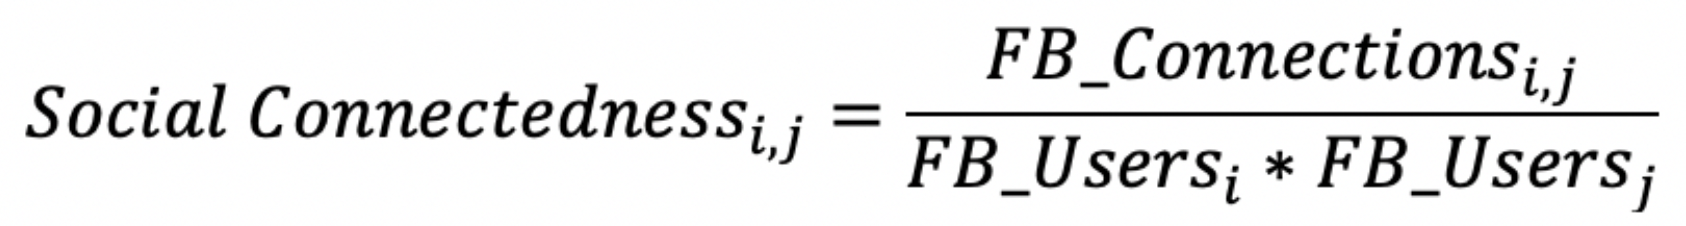

Here, FB_Usersi and FB_Usersj are the number of Facebook users in locations i and j, and FB_Connectionsi,j is the number of Facebook friendship connections between the two.

Social Connectednessi,j, therefore, measures the relative probability of a Facebook friendship link between a given Facebook user in location i and a user in location j. Put differently, if this measure is twice as large, a Facebook user in i is about twice as likely to be connected with a given Facebook user in j.

In each dataset, we scale the measure to have a fixed maximum value (by dividing the original measure by the maximum and multiplying by 1,000,000,000) and the lowest possible value of 1. We also round the measure to the nearest integer.


We exclude the following areas: Afghanistan, Western Sahara, China, Cuba, Iraq, Israel, Iran, North Korea, Russia, Syria, Somalia, South Sudan, Sudan, Venezuela, Yemen, Crimea, Jammu and Kashmir, Donetsk, Luhansk, Sevastopol, West Bank, and Gaza.

In [95]:
sc_index = pd.read_csv('countries-countries-fb-social-connectedness-index-october-2021.csv', sep='\t')

In [96]:
sc_index.head()

,user_loc,fr_loc,scaled_sci
0,AE,AE,1117179
1,AE,AG,5488
2,AE,AL,2101
3,AE,AM,3580
4,AE,AO,2326


In [97]:
sc_index.rename(columns={'user_loc': 'country1', 'fr_loc': 'country2'}, inplace=True)

Each row is a country – country pair. Countries are denoted by their ISO2 codes. Excludes certain countries, for example countries where Facebook is banned or countries with few active users.

In [98]:
country_pairs_sci = country_pairs_year.copy()
country_pairs_sci.head()

,country,issue_country,year,URL
0,AE,AE,2019,530
1,AE,AE,2020,220
2,AE,AE,2021,25
3,AE,AR,2021,2
4,AE,AT,2020,6


In [99]:
country_pairs_sci = country_pairs_sci.merge(sc_index, how = 'left', left_on = ['country', 'issue_country'],
                                   right_on=['country1', 'country2'])

In [100]:
country_pairs_sci = country_pairs_sci[['country','issue_country','year','URL','scaled_sci']]
print(country_pairs_sci.shape)
country_pairs_sci.head()

(8846, 5)


,country,issue_country,year,URL,scaled_sci
0,AE,AE,2019,530,1117179.0
1,AE,AE,2020,220,1117179.0
2,AE,AE,2021,25,1117179.0
3,AE,AR,2021,2,737.0
4,AE,AT,2020,6,4558.0


In [101]:
sci_no_mutual = country_pairs_sci.loc[country_pairs_sci['country'] != country_pairs_sci['issue_country']]
sci_no_mutual.shape

(8570, 5)

In [102]:
sci_no_mutual.sort_values(by='scaled_sci', ascending=False)[:5]

,country,issue_country,year,URL,scaled_sci
5807,NI,CR,2017,67,825540.0
5251,LU,PT,2017,66,753537.0
5252,LU,PT,2018,67,753537.0
5255,LU,PT,2021,144,753537.0
5254,LU,PT,2020,518,753537.0


----

# Home Bias 

- the degree to which countries prefer music created in one’s home country

In [103]:
country_pairs_home_bias = country_pairs_year.copy()
country_pairs_home_bias.head()

,country,issue_country,year,URL
0,AE,AE,2019,530
1,AE,AE,2020,220
2,AE,AE,2021,25
3,AE,AR,2021,2
4,AE,AT,2020,6


In [104]:
#total songs in charts in country per year
country_pairs_total = country_pairs_home_bias.groupby(['country', 'year'])['URL'].sum().reset_index().rename(columns={'URL':'total_URL'})
country_pairs_total.head(2)

,country,year,total_URL
0,AE,2018,1534
1,AE,2019,17409


In [105]:
country_pairs_home_bias = country_pairs_home_bias.merge(country_pairs_total, how='left', on=['country', 'year'])
print(country_pairs_home_bias.shape)
country_pairs_home_bias.head()

(8846, 5)


,country,issue_country,year,URL,total_URL
0,AE,AE,2019,530,17409
1,AE,AE,2020,220,16621
2,AE,AE,2021,25,12857
3,AE,AR,2021,2,12857
4,AE,AT,2020,6,16621


In [106]:
#total songs in charts from home country

home_bias = country_pairs_home_bias.loc[country_pairs_home_bias['country'] == country_pairs_home_bias['issue_country']]
home_bias = home_bias[['country', 'year', 'URL']].rename(columns={'URL':'total_domestic'})
home_bias.head(2)

,country,year,total_domestic
0,AE,2019,530
1,AE,2020,220


In [107]:
country_pairs_home_bias = country_pairs_home_bias.merge(home_bias, how='left', on=['country', 'year'])
print(country_pairs_home_bias.shape)
country_pairs_home_bias.head()

(8846, 6)


,country,issue_country,year,URL,total_URL,total_domestic
0,AE,AE,2019,530,17409,530.0
1,AE,AE,2020,220,16621,220.0
2,AE,AE,2021,25,12857,25.0
3,AE,AR,2021,2,12857,25.0
4,AE,AT,2020,6,16621,220.0


In [108]:
country_pairs_home_bias['domestic_ratio'] = country_pairs_home_bias['total_domestic']/country_pairs_home_bias['total_URL']

In [109]:
country_pairs_home_bias = country_pairs_home_bias.loc[country_pairs_home_bias['country'] != country_pairs_home_bias['issue_country']]

In [110]:
print(country_pairs_home_bias.shape)
country_pairs_home_bias.head()

(8570, 7)


,country,issue_country,year,URL,total_URL,total_domestic,domestic_ratio
3,AE,AR,2021,2,12857,25.0,0.001944
4,AE,AT,2020,6,16621,220.0,0.013236
5,AE,AT,2021,46,12857,25.0,0.001944
6,AE,AU,2018,20,1534,NaN,NaN
7,AE,AU,2019,138,17409,530.0,0.030444


In [111]:
country_pairs_home_bias = country_pairs_home_bias[['country', 'year', 'domestic_ratio']]
country_pairs_home_bias.drop_duplicates(inplace=True)
country_pairs_home_bias.head()

,country,year,domestic_ratio
3,AE,2021,0.001944
4,AE,2020,0.013236
6,AE,2018,NaN
7,AE,2019,0.030444
80,AR,2017,0.155017


In [112]:
country_pairs_home_bias.year.value_counts()

2021    69
2020    68
2019    65
2018    64
2017    56
Name: year, dtype: int64

In [113]:
total_home_bias = country_pairs_home_bias.groupby(['year'])['domestic_ratio'].mean().to_frame()
total_home_bias.head()

,domestic_ratio
year,
2017,0.169853
2018,0.163982
2019,0.176796
2020,0.159543
2021,0.153305


<BarContainer object of 5 artists>

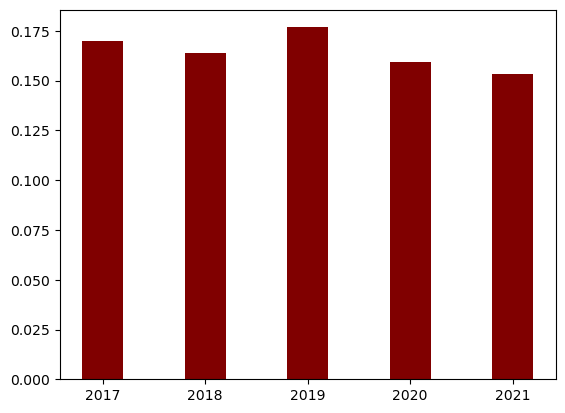

In [114]:
plt.bar(total_home_bias.index, total_home_bias.domestic_ratio, color ='maroon', width = 0.4)

---------

# Gravity Model


1. [Final df](#Final-df)
3. [Model](#Model)

--> Look at Paper 'Local Trends in Global Music Streaming'

- The gravity model of international trade states that the volume of trade between two countries is proportional to their economic mass (approximated using GDP) and a measure of their relative trade frictions.
- We want to investigate whether there are trends in global music exchange that are connected to the SCI through the use of gravity modeling
- To quantify changes in global music exchange over time, we adopt gravity models, a technique borrowed from the economics literature and most often used to model trade flow between countries
- In their simplest form, gravity models assert that, given two countries i and j with economic masses Mi and Mj – frequently approximated using GDP – and separated by a physical distance distancei,j , the trade flow between the countries tradei,j follows the gravity equation


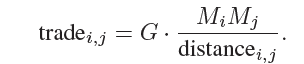


- G denotes a fixed gravitational constant. 
- This simple model provides a useful baseline for the amount of trade flow that one might reasonably expect to observe between countries based solely on their economic sizes and geographic proximity. Naturally, other factors contribute to trade partnerships, including, but not limited to, shared spoken language, colonial histories, or home bias (i.e., when i and j are the same country). Such factors can be incorporated directly into this regression framework by adding dummy variables to Equation 1.

--> incorporation of SCI


## Final df

In [115]:
#pip install gme

In [116]:
import gme as gme
import pandas as pd

In [117]:
#Common Language
print(country_pairs_lng.shape)
#country_pairs_lng = country_pairs_lng.drop(columns='index')
country_pairs_lng.head(5)

(8846, 7)


,country,issue_country,year,URL,country_language,issue_country_language,common_language
0,AE,AE,2019,530,[ar],[ar],1
1,AE,AE,2020,220,[ar],[ar],1
2,AE,AE,2021,25,[ar],[ar],1
3,AE,AR,2021,2,[ar],"[es, gn]",0
4,AE,AT,2020,6,[ar],[de],0


In [118]:
#SCI
country_pairs_sci['scaled_sci'] = 1/country_pairs_sci['scaled_sci']
print(country_pairs_sci.shape)
country_pairs_sci.head()

(8846, 5)


,country,issue_country,year,URL,scaled_sci
0,AE,AE,2019,530,8.951117e-07
1,AE,AE,2020,220,8.951117e-07
2,AE,AE,2021,25,8.951117e-07
3,AE,AR,2021,2,1.356852e-03
4,AE,AT,2020,6,2.193945e-04


In [119]:
#Merging Common Language and SCI
#final_df = common_lng.merge(sci, how = 'inner', on = ['country', 'issue_country', 'year', 'URL'])
final_df = country_pairs_lng.merge(country_pairs_sci, how='left', on = ['country', 'issue_country', 'year', 'URL'])
print(final_df.shape)
print(final_df.year.value_counts())
final_df.head()

(8846, 8)
2018    1863
2021    1787
2020    1767
2017    1716
2019    1713
Name: year, dtype: int64


,country,issue_country,year,URL,country_language,issue_country_language,common_language,scaled_sci
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07
3,AE,AR,2021,2,[ar],"[es, gn]",0,1.356852e-03
4,AE,AT,2020,6,[ar],[de],0,2.193945e-04


In [120]:
final_df.isnull().sum()
#if i would use inner, then scaled_sci 0 NaN values

country                     0
issue_country               0
year                        0
URL                         0
country_language            0
issue_country_language      0
common_language             0
scaled_sci                542
dtype: int64

In [121]:
###DOWNLOADING CEPII DATASET
gravity_df = pd.read_csv('Gravity_V202102.csv')

In [122]:
gravity_df.year.value_counts(sort = False)
#Years Only Until 2019

1948    61504
1949    61504
1950    61504
1951    61504
1952    61504
        ...  
2015    61504
2016    61504
2017    61504
2018    61504
2019    61504
Name: year, Length: 72, dtype: int64

In [123]:
#Selecting relevant years
years = (gravity_df['year'] > 2016) & (gravity_df['year'] <= 2021)
gravity = gravity_df.loc[years]

In [124]:
gravity.year.value_counts()

2017    61504
2018    61504
2019    61504
Name: year, dtype: int64

In [125]:
gravity.head(2)

,year,iso3_o,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,gmt_offset_2020_d,contig,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
69,2017,ABW,ABW,533.0,533.0,1,1,-4.0,-4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2018,ABW,ABW,533.0,533.0,1,1,-4.0,-4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cultural Distance


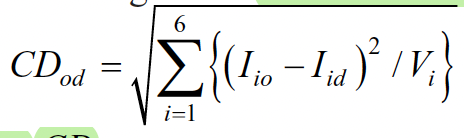

- CD: Cultural Distance origin - destination
- i: 1-6 culturial dimensions
- I: index of the ith cultural dimension of the origin
- V: variance of the index of the ith dimension

In [126]:
hofstede = country_pairs_culture_year.copy()
#hofstede = hofstede.drop(columns='index')
hofstede.head()

,country_x,issue_country,year,URL,issue_country_fullname,country_fullname,ctr_x,country_y,pdi_x,idv_x,...,mas_y,uai_y,ltowvs_y,ivr_y,pdi_difference,idv_difference,mas_difference,uai_difference,ltowvs_difference,ivr_difference
0,AE,AE,2019,530,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,53.0,68.0,23.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AE,AE,2020,220,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,53.0,68.0,23.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AE,AE,2021,25,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,53.0,68.0,23.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AE,AR,2021,2,Argentina,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,56.0,86.0,20.0,62.0,31.0,8.0,3.0,18.0,3.0,28.0
4,AE,AT,2020,6,Austria,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,79.0,70.0,60.0,63.0,69.0,17.0,26.0,2.0,37.0,29.0


In [127]:
hofstede.isnull().sum()

country_x                    0
issue_country                0
year                         0
URL                          0
issue_country_fullname       0
country_fullname             0
ctr_x                      491
country_y                  491
pdi_x                     1090
idv_x                     1090
mas_x                     1090
uai_x                     1090
ltowvs_x                  1101
ivr_x                     1092
ctr_y                       12
country                     12
pdi_y                      453
idv_y                      453
mas_y                      453
uai_y                      453
ltowvs_y                   264
ivr_y                      170
pdi_difference            1472
idv_difference            1472
mas_difference            1472
uai_difference            1472
ltowvs_difference         1307
ivr_difference            1227
dtype: int64

In [128]:
from math import sqrt
import numpy as np

#for col in hofstede.columns[22:28]:
#Hofstede and Datset some countries may be left out --> closer look at it; which ones are missing 

###For each dimension Inner calculation under the root

pdi_inner_list = []
for row in hofstede['pdi_difference']:
    pdi_inner = row**2/np.var(hofstede['pdi_difference']) #like this pdi_inner is only the last value
    pdi_inner_list.append(pdi_inner)

idv_inner_list = []
for row in hofstede['idv_difference']:
    idv_inner = row**2/np.var(hofstede['idv_difference'])
    idv_inner_list.append(idv_inner)

mas_inner_list = []
for row in hofstede['mas_difference']:
    mas_inner = row**2/np.var(hofstede['mas_difference'])
    mas_inner_list.append(mas_inner)

uai_inner_list = []
for row in hofstede['uai_difference']:
    uai_inner = row**2/np.var(hofstede['uai_difference'])
    uai_inner_list.append(uai_inner)

ltowvs_inner_list = []
for row in hofstede['ltowvs_difference']:
    ltowvs_inner = row**2/np.var(hofstede['ltowvs_difference'])
    ltowvs_inner_list.append(ltowvs_inner)

ivr_inner_list = []
for row in hofstede['ivr_difference']:
    ivr_inner = row**2/np.var(hofstede['ivr_difference']) 
    ivr_inner_list.append(ivr_inner)

In [129]:
###Create new column CD for each country-pair in the Dataframe

hofstede['cd'] = 0.0
count = 0

def isNaN(num):
    return num != num

#iterate through each row 
for row in hofstede['cd']:
    
    inner_calc = 0
    
    #check for each country-pair, if the dimension differece is NaN
    #if NaN, 'pass' and go on to next dimension // otherwise add the dimension difference to inner calc
    #this way in cd column there are no NaNs 
    #bc for the sum inside the root only include dimensions that exist for BOTH counries
    if isNaN(pdi_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + pdi_inner_list[count]
        
    if isNaN(idv_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + idv_inner_list[count]
        
    if isNaN(mas_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + mas_inner_list[count]
    
    if isNaN(uai_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + uai_inner_list[count]
    
    if isNaN(ltowvs_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + ltowvs_inner_list[count]
        
    if isNaN(ivr_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + ivr_inner_list[count]
     
    #take the root only for dimensions where no NaN
    hofstede['cd'][count] = sqrt(inner_calc)
    count += 1

hofstede.head()

,country_x,issue_country,year,URL,issue_country_fullname,country_fullname,ctr_x,country_y,pdi_x,idv_x,...,uai_y,ltowvs_y,ivr_y,pdi_difference,idv_difference,mas_difference,uai_difference,ltowvs_difference,ivr_difference,cd
0,AE,AE,2019,530,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,68.0,23.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,AE,AE,2020,220,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,68.0,23.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,AE,AE,2021,25,United Arab Emirates,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,68.0,23.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,AE,AR,2021,2,Argentina,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,86.0,20.0,62.0,31.0,8.0,3.0,18.0,3.0,28.0,2.638358
4,AE,AT,2020,6,Austria,United Arab Emirates,ARA,United Arab Emirates,80.0,38.0,...,70.0,60.0,63.0,69.0,17.0,26.0,2.0,37.0,29.0,4.929516


In [130]:
hofstede = hofstede[['country_x', 'issue_country', 'year', 'cd']]
hofstede.rename(columns={'country_x': 'country'}, inplace=True)

In [131]:
#hofstede['cd'] = hofstede['cd'].replace({0.0:np.nan})
#eco_dist.loc[eco_dist.country_iso3 == eco_dist.issue_country_iso3, 'tradeflow_o_d_percentage'] = 0.0

In [132]:
hofstede.isnull().sum()

country          0
issue_country    0
year             0
cd               0
dtype: int64

In [133]:
hofstede.head()

,country,issue_country,year,cd
0,AE,AE,2019,0.000000
1,AE,AE,2020,0.000000
2,AE,AE,2021,0.000000
3,AE,AR,2021,2.638358
4,AE,AT,2020,4.929516


In [134]:
country_pairs_culture = hofstede.copy()

## Geographic Distance

In [135]:
geo_dist = gravity[['iso3_o', 'iso3_d', 'distcap']]
geo_dist.rename(columns={'iso3_o': 'issue_country_iso3', 'iso3_d':'country_iso3'}, inplace=True)
geo_dist = geo_dist.drop_duplicates() #geographic distance stays the smae no matter the year
geo_dist.head()

,issue_country_iso3,country_iso3,distcap
69,ABW,ABW,5.225
141,ABW,AFG,13257.814
213,ABW,AGO,9516.913
285,ABW,AIA,983.268
357,ABW,ALB,9091.742


In [136]:
#WHY HERE DISTANCE
geo_dist.loc[geo_dist.country_iso3 == geo_dist.issue_country_iso3]

,issue_country_iso3,country_iso3,distcap
69,ABW,ABW,5.225
17997,AFG,AFG,303.761
35925,AGO,AGO,419.967
53853,AIA,AIA,3.799
71781,ALB,ALB,63.773
...,...,...,...
4356573,YMD,YMD,NaN
4374501,YUG,YUG,NaN
4392429,ZAF,ZAF,415.430
4410357,ZMB,ZMB,326.302


In [137]:
#geo_dist.loc[geo_dist.country_iso3 == geo_dist.issue_country_iso3, 'distcap'] = 0.0
#geo_dist.head()

In [138]:
#Getting Iso3 for every column
country_iso3 = []

for country in final_df['country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    country_iso3.append(iso3)

In [139]:
#Getting Iso3 for every column
issue_country_iso3 = []

for country in final_df['issue_country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    issue_country_iso3.append(iso3)

In [140]:
final_df['country_iso3'] = country_iso3
final_df['issue_country_iso3'] = issue_country_iso3

In [141]:
final_df.head()

,country,issue_country,year,URL,country_language,issue_country_language,common_language,scaled_sci,country_iso3,issue_country_iso3
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07,ARE,ARE
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07,ARE,ARE
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07,ARE,ARE
3,AE,AR,2021,2,[ar],"[es, gn]",0,1.356852e-03,ARE,ARG
4,AE,AT,2020,6,[ar],[de],0,2.193945e-04,ARE,AUT


In [142]:
print(final_df.shape)
print(geo_dist.shape)

(8846, 10)
(61504, 3)


## Economic Distance

- We measured economic distance as the
inverse of the average percentage of bilateral trade
flows between an origin and destination over total
international trade to reflect countries’ economic distance
(in log). Data were constructed from the CEPII
Gravity database. A positive and significant estimate
of lndist_eco lends support to H2c.

- Reverse percentages (or inverse percentages) means working backwards to find an original amount, given a percentage of that amount. We can do this using a calculator by taking the percentage we have been given, dividing to find 1% and then multiplying by 100 to find 100% .

- Every number has an “inverse” which is calculated by dividing 1 by that number. For example, the inverse of 5 is 1/5 (or 0.2) Calculate the average of the set (A+B+C+D+E+F)/6 = G, and then calculate the inverse of that average (1/G).

In [143]:
#Selecting relevant years WITH 2016 bc of lagged value
years = (gravity_df['year'] >= 2016) & (gravity_df['year'] <= 2021)
gravity_2016 = gravity_df.loc[years]

In [144]:
eco_dist = gravity_2016[['iso3_o', 'iso3_d', 'year', 'tradeflow_comtrade_o', 'tradeflow_comtrade_d']]

#eco_dist = gravity_2016[['iso3_o', 'iso3_d', 'year', 'tradeflow_imf_o', 'tradeflow_imf_d']] #less missing values
#eco_dist3 = gravity[['iso3_o', 'iso3_d', 'tradeflow_baci', 'manuf_tradeflow_baci']]

In [145]:
print(eco_dist.shape)
eco_dist.isnull().sum()

(246016, 5)


iso3_o                       0
iso3_d                       0
year                         0
tradeflow_comtrade_o    163979
tradeflow_comtrade_d    151220
dtype: int64

In [146]:
eco_dist.year.value_counts()

2016    61504
2017    61504
2018    61504
2019    61504
Name: year, dtype: int64

In [147]:
eco_dist['year_lagged'] = eco_dist['year']+1

In [148]:
eco_dist.rename(columns={'iso3_o': 'issue_country_iso3', 'iso3_d': 'country_iso3'}, inplace=True)
#eco_dist = eco_dist.loc[eco_dist['country_iso3'] != eco_dist['issue_country_iso3']]
eco_dist.head()

#tradeflow = exports - imports
#tradeflow_total = tradeflow_imf_o + tradeflow_imf_d
#tradeflow_imf_o: tradeflow as reported by the exporter/origin
#tradeflow_imf_d: tradeflow as reported by the importer/destination

,issue_country_iso3,country_iso3,year,tradeflow_comtrade_o,tradeflow_comtrade_d,year_lagged
68,ABW,ABW,2016,NaN,NaN,2017
69,ABW,ABW,2017,NaN,NaN,2018
70,ABW,ABW,2018,NaN,NaN,2019
71,ABW,ABW,2019,NaN,NaN,2020
140,ABW,AFG,2016,NaN,NaN,2017


----
Getting 2020 trade flow data from Comtrade

In [149]:
tradeflow_2020 = pd.read_csv('tradeflow_2020_viral.csv')
tradeflow_2020 = tradeflow_2020.drop(columns='Unnamed: 0')
tradeflow_2020['year_lagged'] = tradeflow_2020['year']+1
print(tradeflow_2020.shape)
tradeflow_2020.head()

(2679, 6)


,issue_country_iso3,country_iso3,year,tradeflow_comtrade_o,tradeflow_comtrade_d,year_lagged
0,ARE,ARE,2020,NaN,NaN,2021
1,ARG,ARE,2020,541.590212,0.267768,2021
2,AUT,ARE,2020,526.469178,0.943811,2021
3,AUS,ARE,2020,1949.549209,1.660694,2021
4,BEL,ARE,2020,2366.326768,2.153589,2021


In [150]:
tradeflow_2020.isnull().sum()

issue_country_iso3        0
country_iso3              0
year                      0
tradeflow_comtrade_o    211
tradeflow_comtrade_d    248
year_lagged               0
dtype: int64

In [151]:
print(eco_dist.shape)
print(tradeflow_2020.shape)

(246016, 6)
(2679, 6)


In [152]:
eco_dist = pd.concat([eco_dist, tradeflow_2020])

In [153]:
print(eco_dist.shape)
print('\n', eco_dist.year.value_counts())
print('\n', eco_dist.isnull().sum())
eco_dist.head(2)

(248695, 6)

 2016    61504
2017    61504
2018    61504
2019    61504
2020     2679
Name: year, dtype: int64

 issue_country_iso3           0
country_iso3                 0
year                         0
tradeflow_comtrade_o    164190
tradeflow_comtrade_d    151468
year_lagged                  0
dtype: int64


,issue_country_iso3,country_iso3,year,tradeflow_comtrade_o,tradeflow_comtrade_d,year_lagged
68,ABW,ABW,2016,NaN,NaN,2017
69,ABW,ABW,2017,NaN,NaN,2018


In [154]:
#check = eco_dist.loc[eco_dist.issue_country_iso3 == eco_dist.country_iso3]
#print(check.tradeflow_comtrade_o.value_counts())
#print(check.tradeflow_comtrade_d.value_counts())

In [155]:
#check.loc[check.tradeflow_comtrade_o > 0]

In [156]:
country_pairs_eco = country_pairs_year.copy()
#country_pairs_eco = country_pairs_eco.drop(columns='index')
print(country_pairs_eco.shape)
country_pairs_eco.head(3)

(8846, 4)


,country,issue_country,year,URL
0,AE,AE,2019,530
1,AE,AE,2020,220
2,AE,AE,2021,25


In [157]:
#Getting Iso3 for every column
country_iso3 = []

for country in country_pairs_eco['country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    country_iso3.append(iso3)

In [158]:
#Getting Iso3 for every column
issue_country_iso3 = []

for country in country_pairs_eco['issue_country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    issue_country_iso3.append(iso3)

In [159]:
country_pairs_eco['country_iso3'] = country_iso3
country_pairs_eco['issue_country_iso3'] = issue_country_iso3

In [160]:
country_pairs_eco.head(2)

,country,issue_country,year,URL,country_iso3,issue_country_iso3
0,AE,AE,2019,530,ARE,ARE
1,AE,AE,2020,220,ARE,ARE


In [161]:
eco_dist.head(2)

,issue_country_iso3,country_iso3,year,tradeflow_comtrade_o,tradeflow_comtrade_d,year_lagged
68,ABW,ABW,2016,NaN,NaN,2017
69,ABW,ABW,2017,NaN,NaN,2018


In [162]:
eco_dist['year']=eco_dist['year'].astype(int)
country_pairs_eco['year']=country_pairs_eco['year'].astype(int)

In [163]:
country_pairs_eco = country_pairs_eco.merge(eco_dist, how='left', left_on=['country_iso3', 'issue_country_iso3', 'year'],
                                           right_on=['country_iso3', 'issue_country_iso3', 'year_lagged'])

In [164]:
print(country_pairs_eco.shape)
country_pairs_eco.rename(columns={'year_x': 'year'}, inplace=True)
country_pairs_eco = country_pairs_eco.drop(columns='year_y')
country_pairs_eco = country_pairs_eco.drop(columns='year_lagged')
country_pairs_eco.head(2)

(8846, 10)


,country,issue_country,year,URL,country_iso3,issue_country_iso3,tradeflow_comtrade_o,tradeflow_comtrade_d
0,AE,AE,2019,530,ARE,ARE,NaN,NaN
1,AE,AE,2020,220,ARE,ARE,NaN,NaN


In [165]:
print(country_pairs_eco.year.value_counts())

2018    1863
2021    1787
2020    1767
2017    1716
2019    1713
Name: year, dtype: int64


------

In [166]:
#total sum of exporter & importer
country_pairs_eco['tradeflow_o_d'] = country_pairs_eco['tradeflow_comtrade_o'] + country_pairs_eco['tradeflow_comtrade_d']

In [167]:
#total international trade of both country
tradeflow_o_total = country_pairs_eco.groupby(['issue_country_iso3', 'year']).tradeflow_comtrade_o.sum().to_frame()
tradeflow_o_total.reset_index(inplace=True) 
tradeflow_o_total.rename(columns={'tradeflow_comtrade_o': 'tradeflow_o_total'}, inplace=True)
tradeflow_o_total.head(2)

,issue_country_iso3,year,tradeflow_o_total
0,ARE,2017,3.197396e+06
1,ARE,2018,3.672333e+07


In [168]:
#total international trade of both country
tradeflow_d_total = country_pairs_eco.groupby(['country_iso3', 'year']).tradeflow_comtrade_d.sum().to_frame()
tradeflow_d_total.reset_index(inplace=True) 
tradeflow_d_total.rename(columns={'tradeflow_comtrade_d': 'tradeflow_d_total'}, inplace=True)
tradeflow_d_total.head(2)

,country_iso3,year,tradeflow_d_total
0,ARE,2018,5.424958e+07
1,ARE,2019,1.020725e+08


In [169]:
country_pairs_eco = country_pairs_eco.merge(tradeflow_o_total, how = 'left', on = ['issue_country_iso3', 'year'])
country_pairs_eco = country_pairs_eco.merge(tradeflow_d_total, how = 'left', on = ['country_iso3', 'year'])

In [170]:
print(country_pairs_eco.shape)
print(country_pairs_eco.year.value_counts())

(8846, 11)
2018    1863
2021    1787
2020    1767
2017    1716
2019    1713
Name: year, dtype: int64


In [171]:
country_pairs_eco.head(2)

,country,issue_country,year,URL,country_iso3,issue_country_iso3,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_o_d,tradeflow_o_total,tradeflow_d_total
0,AE,AE,2019,530,ARE,ARE,NaN,NaN,NaN,6.477659e+07,1.020725e+08
1,AE,AE,2020,220,ARE,ARE,NaN,NaN,NaN,0.000000e+00,0.000000e+00


In [172]:
country_pairs_eco['tradeflow_o_d_percentage'] = country_pairs_eco['tradeflow_o_d']/(country_pairs_eco['tradeflow_o_total']+country_pairs_eco['tradeflow_d_total'])
#eco_dist.head()
#eco_dist.loc[eco_dist['tradeflow_o_d_percentage'] > 0]

In [173]:
#eco_dist.loc[eco_dist.country_iso3 == eco_dist.issue_country_iso3, 'tradeflow_o_d_percentage'] = 0.0

In [174]:
country_pairs_eco = country_pairs_eco[['country_iso3', 'issue_country_iso3', 'year', 'tradeflow_o_d_percentage']]
#eco_dist.dropna()

In [175]:
country_pairs_eco['tradeflow_o_d_percentage']

0            NaN
1            NaN
2            NaN
3       0.023999
4            NaN
          ...   
8841         NaN
8842         NaN
8843         NaN
8844         NaN
8845         NaN
Name: tradeflow_o_d_percentage, Length: 8846, dtype: float64

In [176]:
#Taking the inverse
country_pairs_eco['tradeflow_o_d_percentage'] = 1/country_pairs_eco['tradeflow_o_d_percentage']

In [177]:
country_pairs_eco['tradeflow_o_d_percentage']

0             NaN
1             NaN
2             NaN
3       41.667828
4             NaN
          ...    
8841          NaN
8842          NaN
8843          NaN
8844          NaN
8845          NaN
Name: tradeflow_o_d_percentage, Length: 8846, dtype: float64

In [178]:
country_pairs_eco.head()

,country_iso3,issue_country_iso3,year,tradeflow_o_d_percentage
0,ARE,ARE,2019,NaN
1,ARE,ARE,2020,NaN
2,ARE,ARE,2021,NaN
3,ARE,ARG,2021,41.667828
4,ARE,AUT,2020,NaN


In [179]:
#eco_dist.head(100)
#eco_dist.loc[eco_dist.country_iso3 == eco_dist.issue_country_iso3, 'tradeflow_o_d_percentage'] = 0.0
country_pairs_eco.loc[country_pairs_eco['tradeflow_o_d_percentage'] > 0]

,country_iso3,issue_country_iso3,year,tradeflow_o_d_percentage
3,ARE,ARG,2021,41.667828
5,ARE,AUT,2021,210.392989
6,ARE,AUS,2018,31.032821
7,ARE,AUS,2019,42.286103
9,ARE,AUS,2021,55.869729
...,...,...,...,...
8836,ZAF,SWE,2020,101.333045
8837,ZAF,SWE,2021,117.078001
8838,ZAF,USA,2018,121.763243
8839,ZAF,USA,2019,128.861195


In [180]:
print(country_pairs_eco.shape)
country_pairs_eco.isnull().sum()

(8846, 4)


country_iso3                   0
issue_country_iso3             0
year                           0
tradeflow_o_d_percentage    1000
dtype: int64

----

In [181]:
#country_pairs_eco.to_csv('country_pairs_eco.csv')

In [182]:
test = country_pairs_eco.loc[country_pairs_eco.issue_country_iso3 == country_pairs_eco.country_iso3]
test.loc[test.tradeflow_o_d_percentage > 0]

,country_iso3,issue_country_iso3,year,tradeflow_o_d_percentage
954,BRA,BRA,2019,30.705216


How do you calculate bilateral trade balance?
- Bilateral trade balances are calculated by adding up all of Country A’s exports to Country B, then subtracting all of Country A’s imports from Country B. If the resulting number is positive, Country A is said to have a “trade surplus” with Country B. In other words, the value of its exports is larger than the value of its imports. On the other hand, if imports outweigh exports, Country A would be said to have a “trade deficit” with Country B.

## Final_df

In [183]:
df_model = final_df.copy()
print(df_model.shape)
df_model.head(3)

(8846, 10)


,country,issue_country,year,URL,country_language,issue_country_language,common_language,scaled_sci,country_iso3,issue_country_iso3
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07,ARE,ARE
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07,ARE,ARE
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07,ARE,ARE


In [184]:
#Merging with Hofstede
df_model = df_model.merge(country_pairs_culture, how = 'left', on = ['country', 'issue_country', 'year'])
df_model.rename(columns={'cd': 'dist_cultural', 'scaled_sci': 'dist_social'}, inplace=True)
df_model.head(3)

,country,issue_country,year,URL,country_language,issue_country_language,common_language,dist_social,country_iso3,issue_country_iso3,dist_cultural
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0


In [185]:
#Merging with Geographic Distance
df_model = df_model.merge(geo_dist, how = 'left', on = ['country_iso3', 'issue_country_iso3'])
df_model.rename(columns={'distcap': 'dist_geo'}, inplace=True)
df_model.head(3)

,country,issue_country,year,URL,country_language,issue_country_language,common_language,dist_social,country_iso3,issue_country_iso3,dist_cultural,dist_geo
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789


In [186]:
df_model['year']=df_model['year'].astype(int)
country_pairs_eco.head()

,country_iso3,issue_country_iso3,year,tradeflow_o_d_percentage
0,ARE,ARE,2019,NaN
1,ARE,ARE,2020,NaN
2,ARE,ARE,2021,NaN
3,ARE,ARG,2021,41.667828
4,ARE,AUT,2020,NaN


In [187]:
#Merging with Economic Distance
df_model = df_model.merge(country_pairs_eco, how = 'left', on = ['country_iso3', 'issue_country_iso3', 'year'])
df_model.rename(columns={'tradeflow_o_d_percentage': 'dist_eco'}, inplace=True)
df_model.head(3)

,country,issue_country,year,URL,country_language,issue_country_language,common_language,dist_social,country_iso3,issue_country_iso3,dist_cultural,dist_geo,dist_eco
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN


In [188]:
#Home-Bias
df_model['home_bias'] = 0
df_model.loc[df_model.country == df_model.issue_country, 'home_bias'] = 1
df_model.head(3)

,country,issue_country,year,URL,country_language,issue_country_language,common_language,dist_social,country_iso3,issue_country_iso3,dist_cultural,dist_geo,dist_eco,home_bias
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN,1
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN,1
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN,1


In [189]:
df_model['home_bias'].value_counts()

0    8570
1     276
Name: home_bias, dtype: int64

In [190]:
#df_model = df_model.drop(columns='year_lagged')
#df_model = df_model.drop(columns='year_y')
#df_model = df_model.drop(columns='Streams_y')
#df_model.rename(columns={'common_lng': 'common_language'}, inplace=True)
df_model.rename(columns={'URL': 'chart_survival'}, inplace=True)

In [191]:
df_model.head(3)

,country,issue_country,year,chart_survival,country_language,issue_country_language,common_language,dist_social,country_iso3,issue_country_iso3,dist_cultural,dist_geo,dist_eco,home_bias
0,AE,AE,2019,530,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN,1
1,AE,AE,2020,220,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN,1
2,AE,AE,2021,25,[ar],[ar],1,8.951117e-07,ARE,ARE,0.0,108.789,NaN,1


In [192]:
df_model.isnull().sum()

country                      0
issue_country                0
year                         0
chart_survival               0
country_language             0
issue_country_language       0
common_language              0
dist_social                542
country_iso3                 0
issue_country_iso3           0
dist_cultural                0
dist_geo                     0
dist_eco                  1000
home_bias                    0
dtype: int64

In [193]:
#the higher, the closer
print('Social Distance')
print(df_model.dist_social.min())
print(df_model.dist_social.max())

#the smaller, the closer
print('\nCultural Distance')
print(df_model.dist_cultural.min())
print(df_model.dist_cultural.max())

#the smaller, the closer
print('\nGeographical Distance')
print(df_model.dist_geo.min())
print(df_model.dist_geo.max())

#the higher, the closer
print('\nEconomic Distance')
print(df_model.dist_eco.min())
print(df_model.dist_eco.max())

Social Distance
5.392582078415671e-09
0.008849557522123894

Cultural Distance
0.0
7.970182405522606

Geographical Distance
9.56
19629.504

Economic Distance
2.528340191171676
5662671.892647059


In [194]:
#df_model.to_csv('df_final.csv')

In [195]:
#Testing

#df_model.loc[df_model.scaled_sci == 123] #--> Thailand & Brazil socially far away connected
#df_model.loc[df_model.dist_social == 435108] #--> Greece & Albania socially connected

#df_model.loc[df_model.cd == 0.12384127797197561] #--> Australia & USA similar culture
#df_model.loc[df_model.cd == 8.04495330499361] #--> Slovakia & Denmark really diffrent culture

#df_model.loc[df_model.dist_geo == 59.617] #--> Slovakia & AUT locally close
#df_model.loc[df_model.dist_geo == 19629.504] #--> South Korea & Urugay locally far away

#df_model.loc[df_model.dist_eco == 2.22636861515322e-06] #--> El Salvador & Bulgaria economically far
#df_model.loc[df_model.dist_eco == 1.2339931720910018] #--> US & Canada economically close

In [196]:
cols = ['dist_social', 'dist_cultural', 'dist_geo', 'dist_eco']
df_model[cols] = df_model[cols].replace({0:np.nan})

In [197]:
df_model[['chart_survival', 'dist_social', 'dist_cultural', 'dist_geo', 'dist_eco']] = np.log(
    df_model[['chart_survival', 'dist_social', 'dist_cultural', 'dist_geo', 'dist_eco']])

In [198]:
df_model.head()

,country,issue_country,year,chart_survival,country_language,issue_country_language,common_language,dist_social,country_iso3,issue_country_iso3,dist_cultural,dist_geo,dist_eco,home_bias
0,AE,AE,2019,6.272877,[ar],[ar],1,-13.926317,ARE,ARE,NaN,4.689410,NaN,1
1,AE,AE,2020,5.393628,[ar],[ar],1,-13.926317,ARE,ARE,NaN,4.689410,NaN,1
2,AE,AE,2021,3.218876,[ar],[ar],1,-13.926317,ARE,ARE,NaN,4.689410,NaN,1
3,AE,AR,2021,0.693147,[ar],"[es, gn]",0,-6.602588,ARE,ARG,0.970157,9.514673,3.729729,0
4,AE,AT,2020,1.791759,[ar],[de],0,-8.424639,ARE,AUT,1.595241,8.353695,NaN,0


In [199]:
#df_model.to_csv('df_final_with_log.csv')

In [200]:
#df_model.loc[df_model.dist_cultural != 'NaN']
#test.home_bias.value_counts()

In [201]:
df_model.year.value_counts()

2018    1863
2021    1787
2020    1767
2017    1716
2019    1713
Name: year, dtype: int64

In [202]:
df_model.shape

(8846, 14)

------

In [203]:
df_model_no_mutual = df_model.copy()

In [204]:
df_model_no_mutual = df_model_no_mutual.loc[df_model_no_mutual['country'] != df_model_no_mutual['issue_country']]
print(df_model_no_mutual.shape)
df_model_no_mutual.head(3)

(8570, 14)


,country,issue_country,year,chart_survival,country_language,issue_country_language,common_language,dist_social,country_iso3,issue_country_iso3,dist_cultural,dist_geo,dist_eco,home_bias
3,AE,AR,2021,0.693147,[ar],"[es, gn]",0,-6.602588,ARE,ARG,0.970157,9.514673,3.729729,0
4,AE,AT,2020,1.791759,[ar],[de],0,-8.424639,ARE,AUT,1.595241,8.353695,NaN,0
5,AE,AT,2021,3.828641,[ar],[de],0,-8.424639,ARE,AUT,1.595241,8.353695,5.348977,0


In [205]:
smallest_sample = df_model_no_mutual.copy()
smallest_sample = smallest_sample.dropna()
#smallest_sample = smallest_sample.loc[smallest_sample.chart_survival > 0]
print(smallest_sample.shape)

(7000, 14)


## Descriptive Statistics

In [206]:
descriptive_stat = df_model.copy()

In [207]:
descriptive_stat = descriptive_stat.drop(columns='year')

In [208]:
descriptive_stat.describe()

,chart_survival,common_language,dist_social,dist_cultural,dist_geo,dist_eco,home_bias
count,8846.000000,8846.000000,8304.000000,8058.000000,8846.000000,7846.000000,8846.000000
mean,4.143246,0.151368,-8.504810,1.165173,8.221027,5.217916,0.031201
std,2.043593,0.358427,1.947965,0.580163,1.191711,1.793468,0.173869
min,0.000000,0.000000,-19.038242,-2.812319,2.257588,0.927563,0.000000
25%,2.639057,0.000000,-9.491224,0.982736,7.404681,3.980588,0.000000
50%,4.043051,0.000000,-8.408717,1.293629,8.587614,5.068603,0.000000
75%,5.369473,0.000000,-7.136483,1.529982,9.170197,6.299596,0.000000
max,9.630694,1.000000,-4.727388,2.075707,9.884789,15.549406,1.000000


### Overview Variables:

Dependent Variable: (major variable of interest)
- **URL** --> reflects the strength of the music influence from the origin country to the destination country

Independent Variables: (these are the variables that we think will influence the music consumption)
- **Common Language**: common_language (dummy variable)
- **Home Bias**: home_bias (dummy variable)
- **Social Distance**: dist_social (static variable)
- **Cultural distance**: dist_cultural (static variable)
- **Geographic Distance**: dist_geo (static variable); in km between the capital cities of an origin and destination country
- **Economic Distance**: dist_eco (dynamic value); we're using its lagged value. For example, for 2021 music flow, we could use 2020 trade flow, because we account for the time effect of the economic relationship


In [209]:
print(df_model.shape)
print(df_model_no_mutual.shape)

(8846, 14)
(8570, 14)


## Model

In [210]:
#Create EstimationData (gme.EstimationData to store data)
#create an instance of the EstimationData object
import gme as gme

gme_data = gme.EstimationData(data_frame = df_model,
                              imp_var_name = 'country',
                              exp_var_name = 'issue_country',
                              trade_var_name = 'chart_survival',
                              year_var_name = 'year')

print(gme_data) #provides a collection of data summary 

number of countries: 69 
number of exporters: 64 
number of importers: 69 
number of years: 5 
number of sectors: not_applicable 
dimensions: (8846, 14)



In [211]:
gme_data.correlation()

,year,chart_survival,common_language,dist_social,dist_cultural,dist_geo,dist_eco,home_bias
year,1.000000,0.064526,0.003135,0.015928,-0.001786,0.007727,-0.033806,0.007627
chart_survival,0.064526,1.000000,0.249826,-0.244508,-0.010542,-0.172623,-0.189011,0.261742
common_language,0.003135,0.249826,1.000000,-0.491285,-0.197611,-0.251559,-0.203932,0.415849
dist_social,0.015928,-0.244508,-0.491285,1.000000,0.247382,0.752500,0.372662,-0.612212
dist_cultural,-0.001786,-0.010542,-0.197611,0.247382,1.000000,0.113015,-0.055591,NaN
dist_geo,0.007727,-0.172623,-0.251559,0.752500,0.113015,1.000000,0.499907,-0.456476
dist_eco,-0.033806,-0.189011,-0.203932,0.372662,-0.055591,0.499907,1.000000,-0.011291
home_bias,0.007627,0.261742,0.415849,-0.612212,NaN,-0.456476,-0.011291,1.000000


In [329]:
gme_data_no_mutual = gme.EstimationData(data_frame = df_model_no_mutual,
                              imp_var_name = 'country',
                              exp_var_name = 'issue_country',
                              trade_var_name = 'chart_survival',
                              year_var_name = 'year')

print(gme_data_no_mutual)

number of countries: 69 
number of exporters: 62 
number of importers: 69 
number of years: 5 
number of sectors: not_applicable 
dimensions: (8570, 14)



In [330]:
gme_smallest_sample = gme.EstimationData(data_frame = smallest_sample,
                              imp_var_name = 'country',
                              exp_var_name = 'issue_country',
                              trade_var_name = 'Streams',
                              year_var_name = 'year')

print(gme_smallest_sample)

number of countries: 63 
number of exporters: 57 
number of importers: 63 
number of years: 5 
number of sectors: not_applicable 
dimensions: (7000, 14)



- EstimationModel is meant to standardize and simplify the steps typically taken to specify and estimate a gravity model
- While the EstimationData is meant to be an object that is created once for each study, many EstimationModels will likely be defined and redefined as you test different specifications
- Thus, the arguments and attributes of the EstimationModel reflect the different types of modifications you may want to make as you select your preferred specification.
- When specifying a model, there are several key types of attributes that can be included:
    - Model Variables: The variables to be included are specified using the arguments lhs_vars and rhs_vars, which denote the left-hand-side dependent variable and right-hand-side independent variables, respectively.
    - Fixed Effects: The model, at the point at which it is estimated, will construct fixed effects if any are specified by fixed_effects. These can be either single variables (e.g. ['importer']), or interacted variables (e.g. [['importer', 'year']]). For example, entering [ 'importer', ['exporter', 'year']] would yield a set of importer fixed effects and a set of exporter-year fixed effects.
    - Data Subsets: Subsets of the data to use for estimation can be specified in a variety of ways. The arguments keep_years and drop_years can be used to select only a subset of years to include. Similarly the keep_imp, keep_exp, and keep_imp_exp arguments, and their corresponding drop_... options can do the same for importers and/or exporters.

## Regression Table for each independant Variable

In [335]:
gme_model2 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'chart_survival',
                                rhs_var = ['common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [336]:
estimates2 = gme_model2.estimate()
results2 = estimates2['all']

Estimation began at 06:02 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


In [337]:
gme_model2_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'chart_survival',
                                rhs_var = ['common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates2_r = gme_model2_r.estimate()
results2_r = estimates2_r['all']

pseudo_rsquared2 = (1 - results2_r.llf / results2_r.llnull)
pseudo_rsquared2

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


0.16495815536145408

In [338]:
#gme_model2.format_regression_table(format = "txt")

In [339]:
#results2.summary()

In [340]:
gme_model4 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'chart_survival',
                                rhs_var = ['dist_social', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [341]:
estimates4 = gme_model4.estimate()
results4 = estimates4['all']

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


In [342]:
gme_model4_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'chart_survival',
                                rhs_var = ['dist_social', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates4_r = gme_model4_r.estimate()
results4_r = estimates4_r['all']

pseudo_rsquared4 = (1 - results4_r.llf / results4_r.llnull)
pseudo_rsquared4

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


0.1691863271924685

In [343]:
#gme_model4.format_regression_table(format = "txt")

In [344]:
gme_model6 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'chart_survival',
                                rhs_var = ['dist_cultural', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [345]:
estimates6 = gme_model6.estimate()
results6 = estimates6['all']

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


In [346]:
gme_model6_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'chart_survival',
                                rhs_var = ['dist_cultural', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates6_r = gme_model6_r.estimate()
results6_r = estimates6_r['all']

pseudo_rsquared6 = (1 - results6_r.llf / results6_r.llnull)
pseudo_rsquared6

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


0.16547940007991757

In [347]:
gme_model8 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'chart_survival',
                                rhs_var = ['dist_eco', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [348]:
estimates8 = gme_model8.estimate()
results8 = estimates8['all']

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


In [349]:
gme_model8_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'chart_survival',
                                rhs_var = ['dist_eco', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates8_r = gme_model8_r.estimate()
results8_r = estimates8_r['all']

pseudo_rsquared8 = (1 - results8_r.llf / results8_r.llnull)
pseudo_rsquared8

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


0.16565086158468567

In [350]:
#gme_model8.format_regression_table(format = "txt")

In [351]:
gme_model10 = gme.EstimationModel(estimation_data = gme_data,
                                lhs_var = 'chart_survival',
                                rhs_var = ['home_bias','dist_geo', 'common_language'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [352]:
estimates10 = gme_model10.estimate()
results10 = estimates10['all']

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


In [353]:
gme_model10_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'chart_survival',
                                rhs_var = ['home_bias', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates10_r = gme_model10_r.estimate()
results10_r = estimates10_r['all']

pseudo_rsquared10 = (1 - results10_r.llf / results10_r.llnull)
pseudo_rsquared10

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['home_bias', 'issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:03 PM  on Nov 25, 2022


0.16495815536145408

In [354]:
gme_model10.ppml_diagnostics

Overfit Warning                                                                  No
Number of Regressors Dropped                                                      5
Regressors with Zero Trade        [issue_country_year_fe_ZA2019, issue_country_y...
Regressors from User                                                             []
Regressors Perfectly Collinear    [issue_country_year_fe_ZA2017, issue_country_y...
Completion Time                                                        0.11 minutes
dtype: object

In [355]:
gme_model10.format_regression_table(format = "txt", variable_list=['home_bias', 'common_language'])

,Variable,all
a_common_language,common_language,0.310***
a_common_language_se,,(0.012)
a_home_bias,home_bias,0.176***
a_home_bias_se,,(0.023)
b_aic,AIC,32324.153
b_bic,BIC,-71374.66
b_llf,Likelihood,-15540.076
b_nobs,Obs.,8846


## All indepent variables together

In [356]:
#Cultural Distance
gme_model11 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'chart_survival', #dependent variable
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_cultural', 'dist_eco'], #independent variables
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']], #importer and exporter fixed effects
                                keep_years = [2017, 2018, 2019, 2020, 2021] #all years are included
                                )
#our trade value URL is dependent on independent variables
#common_language: (dummy) whether two countries have common language

In [357]:
estimates11 = gme_model11.estimate()
results11 = estimates11['all']

Estimation began at 06:03 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:04 PM  on Nov 25, 2022


In [358]:
gme_model11_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'chart_survival',
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_cultural', 'dist_eco'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates11_r = gme_model11_r.estimate()
results11_r = estimates11_r['all']

pseudo_rsquared11 = (1 - results11_r.llf / results11_r.llnull)
pseudo_rsquared11

Estimation began at 06:04 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:04 PM  on Nov 25, 2022


0.1696862109708912

In [359]:
#simple table with regression results
#gme_model11.format_regression_table(format = "txt", variable_list=['common_language', 'dist_geo', 'dist_social', 'dist_cultural', 'dist_eco', 'home_bias'] )

#se=standard error
#x% increase in variable leads to y increase(+)/decrease(-) of trade volume

In [360]:
#results11.summary()

In [361]:
#Home Bias
gme_model12 = gme.EstimationModel(estimation_data = gme_data,
                                lhs_var = 'chart_survival', #dependent variable
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_eco', 'home_bias'], #independent variables
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']], #importer and exporter fixed effects
                                keep_years = [2017, 2018, 2019, 2020, 2021] #all years are included
                                )

In [362]:
estimates12 = gme_model12.estimate()
results12 = estimates12['all']

Estimation began at 06:05 PM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:05 PM  on Nov 25, 2022


In [363]:
gme_model12_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'chart_survival',
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_eco', 'home_bias'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates12_r = gme_model12_r.estimate()
results12_r = estimates12_r['all']

pseudo_rsquared12 = (1 - results12_r.llf / results12_r.llnull)
pseudo_rsquared12

Estimation began at 06:05 PM  on Nov 25, 2022
Omitted Regressors: ['home_bias', 'issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018']
Estimation completed at 06:05 PM  on Nov 25, 2022


0.16921289190676303

In [364]:
gme_model12.ppml_diagnostics

Overfit Warning                                                                  No
Number of Regressors Dropped                                                      5
Regressors with Zero Trade        [issue_country_year_fe_ZA2019, issue_country_y...
Regressors from User                                                             []
Regressors Perfectly Collinear    [issue_country_year_fe_ZA2017, issue_country_y...
Completion Time                                                        0.11 minutes
dtype: object

### Complete regression table

- Stargazer package https://github.com/mwburke/stargazer/blob/master/examples.ipynb

In [365]:
#pip install stargazer

In [366]:
from stargazer.stargazer import Stargazer

stargazer_tab = Stargazer([results2, results4, results6, results8, results10, results12, results11])
stargazer_tab

In [401]:
#SOCIAL
#the higher, the closer --> inverse

#CULTURAL
#the smaller, the closer

#GEOGRAPHICAL
#the smaller, the closer

#ECONOMIC
#the higher, the closer --> inverse